In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df = pd.read_excel("Twitch_Streamer_Data_2023.xlsx")

In [220]:
df

,ID,Channel,Watch time,Stream time,Peak viewers,Average viewers,Followers Prev Yr,Followers,Followers gained,Followers gained percent,Language,Partnered,Mature,Mean weekly watch hours,Mean weekly stream hours,Inverse avg viewers
0,1,KaiCenat,6917573295,111585,348593,61993,4101063,9043160,4942097,1.205077,English,1,0,2.217171e+06,35.764423,0.000016
1,2,Gaules,6622047810,521235,253831,12704,3821821,4061076,239255,0.062602,Portuguese,1,1,2.122451e+06,167.062500,0.000079
2,3,ibai,6263825640,82980,3442745,75485,12241985,15430621,3188636,0.260467,Spanish,1,0,2.007636e+06,26.596154,0.000013
3,4,xQc,5740774005,111765,126238,51364,11483408,11981015,497607,0.043333,English,1,0,1.839992e+06,35.822115,0.000019
4,5,fps_shaka,5015411025,211860,125341,23673,1053268,1367770,314502,0.298596,Japanese,1,0,1.607504e+06,67.903846,0.000042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,896,Datto,171472065,61980,88152,2766,691978,738457,46479,0.067168,English,1,1,5.495900e+04,19.865385,0.000362
896,897,Cydonia_Chiara,171389955,84435,13870,2029,147433,165604,18171,0.123249,Italian,1,0,5.493268e+04,27.062500,0.000493
897,898,Roxasorg13th,171240495,101820,7619,1681,98345,172401,74056,0.753023,Spanish,1,0,5.488477e+04,32.634615,0.000595
898,899,Glooms_,171035505,177300,8111,964,73218,115004,41786,0.570707,Thai,1,0,5.481907e+04,56.826923,0.001037


In [173]:
def inverse(x):
    return 10**8.5/x

In [177]:
df1 = df.iloc[:,2:10]
df2 = df.iloc[:,-2:]

In [180]:
final = df1.join(df2)

In [210]:
final

,Watch time,Stream time,Peak viewers,Average viewers,Followers Prev Yr,Followers,Followers gained,Followers gained percent,Mean weekly watch hours,Mean weekly stream hours
0,6917573295,111585,348593,61993,4101063,9043160,4942097,1.205077,2.217171e+06,35.764423
1,6622047810,521235,253831,12704,3821821,4061076,239255,0.062602,2.122451e+06,167.062500
2,6263825640,82980,3442745,75485,12241985,15430621,3188636,0.260467,2.007636e+06,26.596154
3,5740774005,111765,126238,51364,11483408,11981015,497607,0.043333,1.839992e+06,35.822115
4,5015411025,211860,125341,23673,1053268,1367770,314502,0.298596,1.607504e+06,67.903846
...,...,...,...,...,...,...,...,...,...,...
895,171472065,61980,88152,2766,691978,738457,46479,0.067168,5.495900e+04,19.865385
896,171389955,84435,13870,2029,147433,165604,18171,0.123249,5.493268e+04,27.062500
897,171240495,101820,7619,1681,98345,172401,74056,0.753023,5.488477e+04,32.634615
898,171035505,177300,8111,964,73218,115004,41786,0.570707,5.481907e+04,56.826923


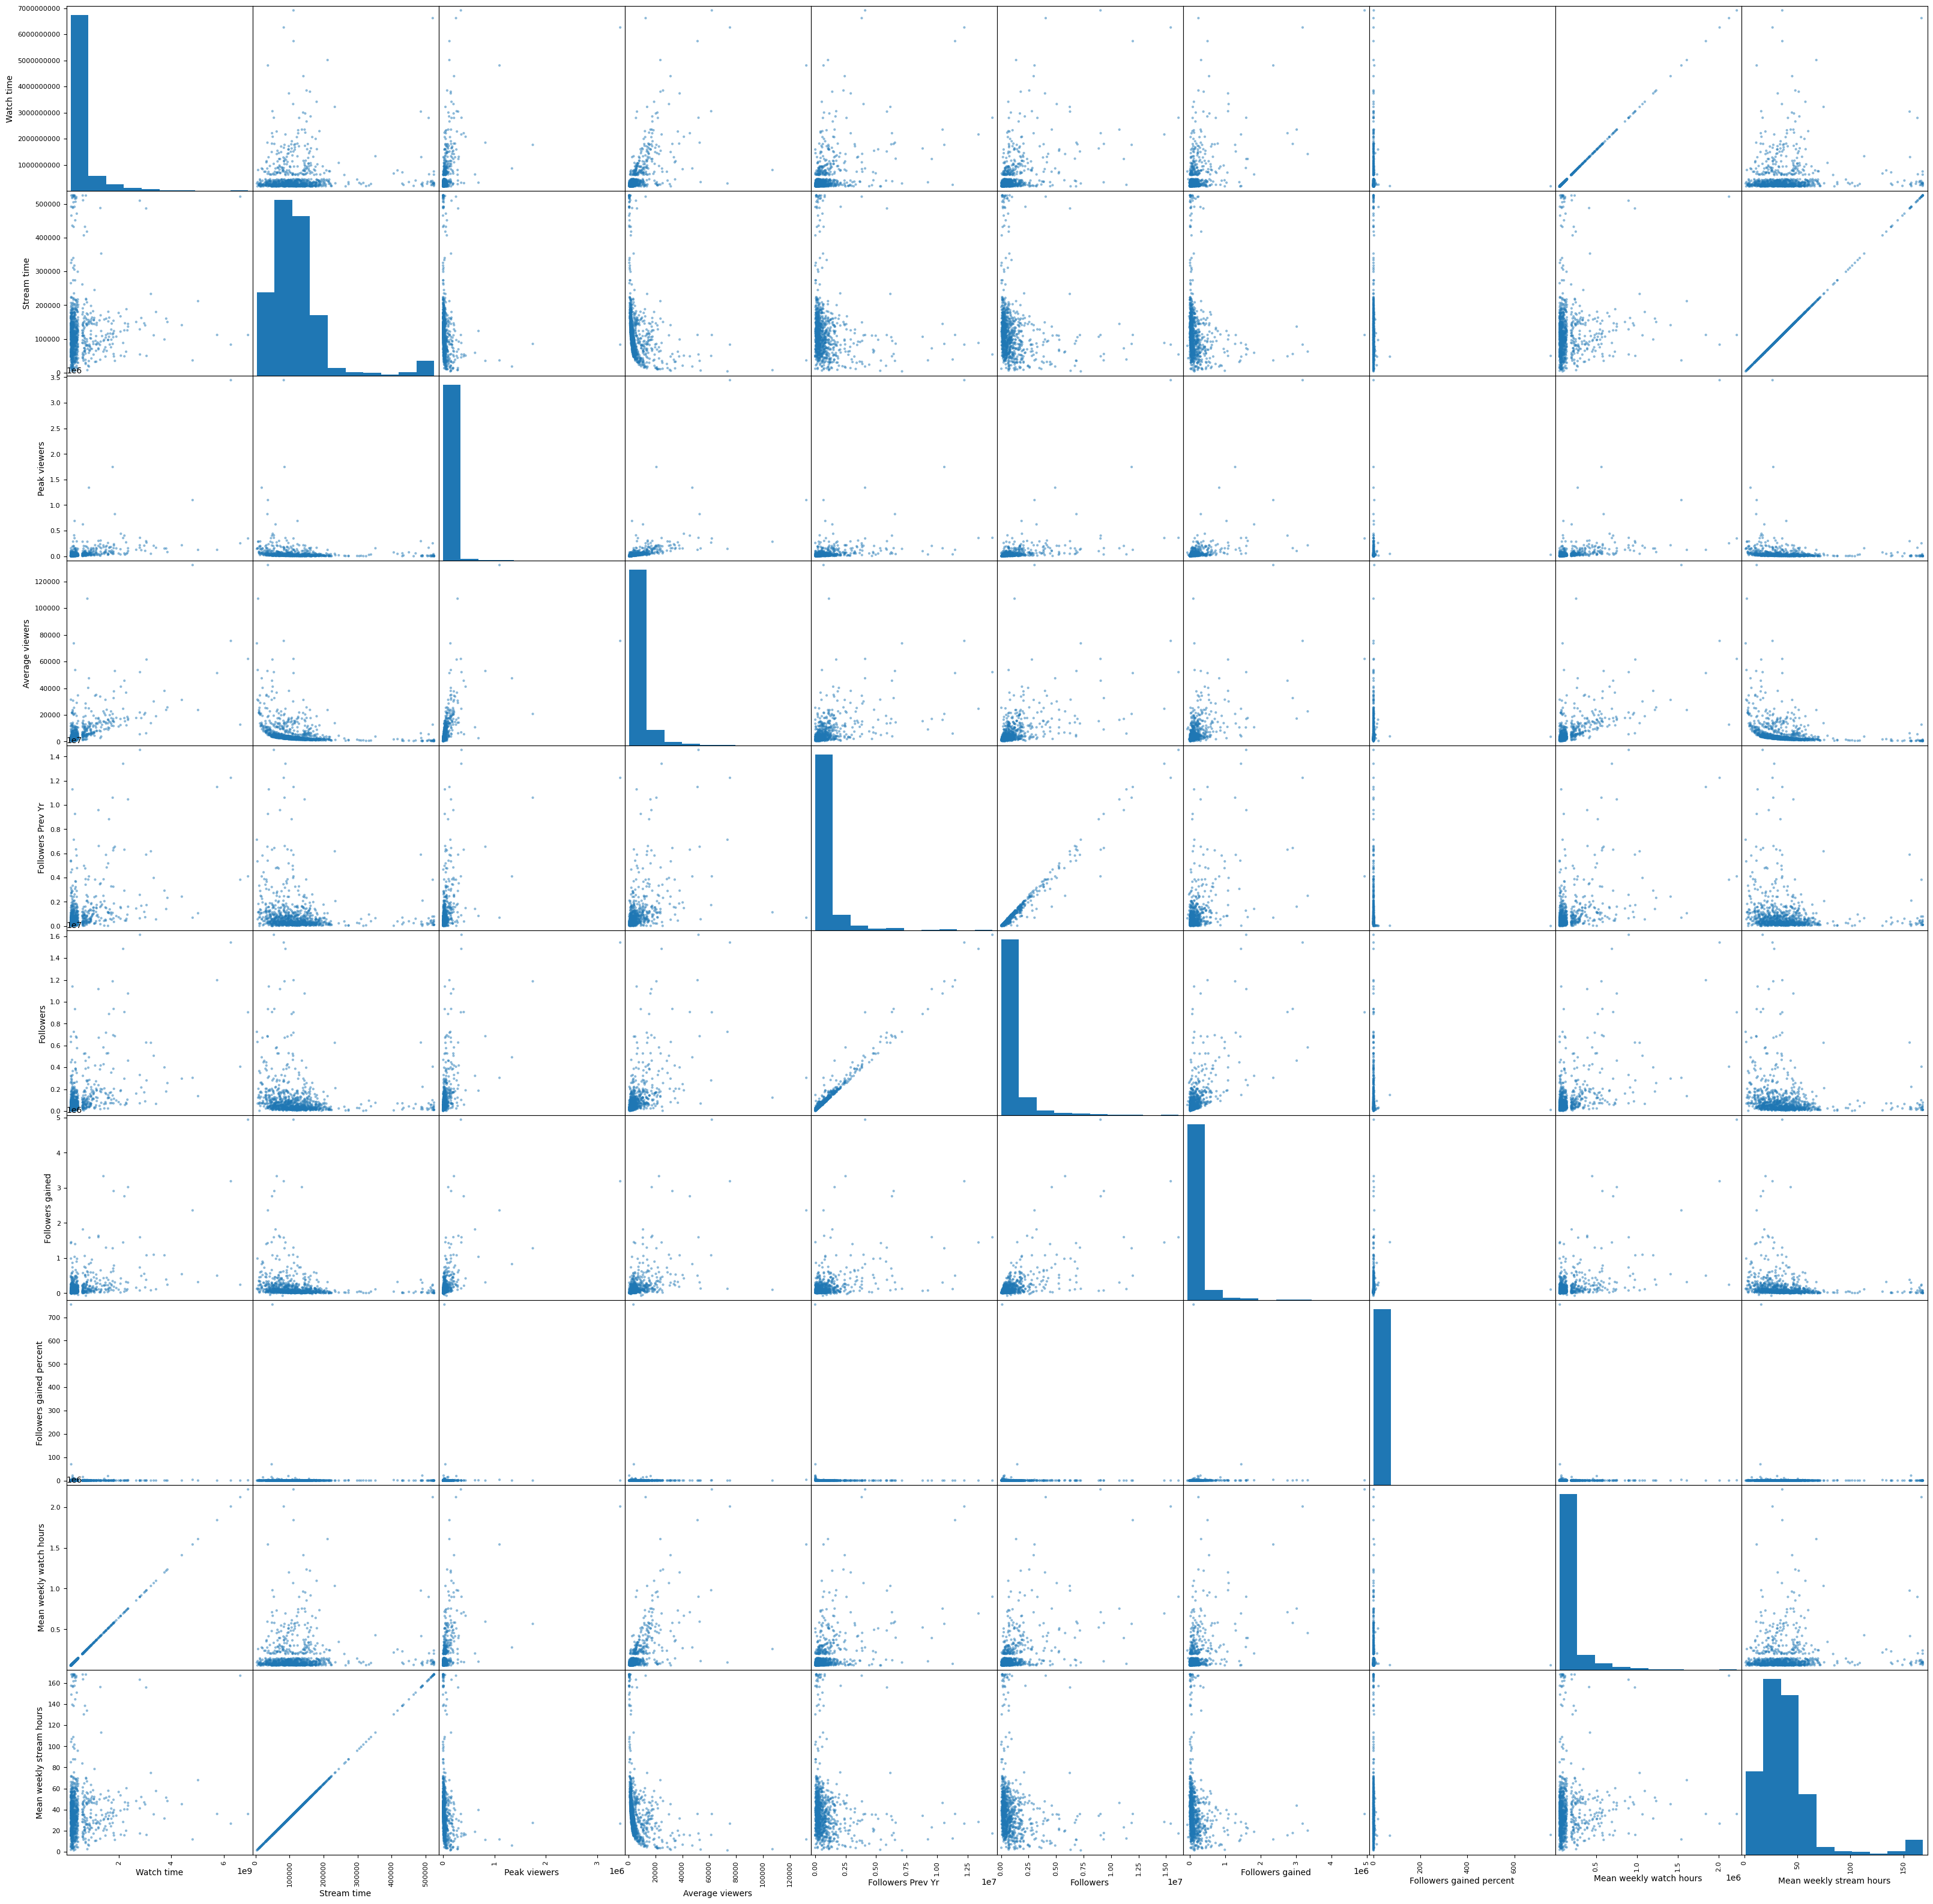

In [181]:
pd.plotting.scatter_matrix(final, figsize = (40,40))
plt.show()

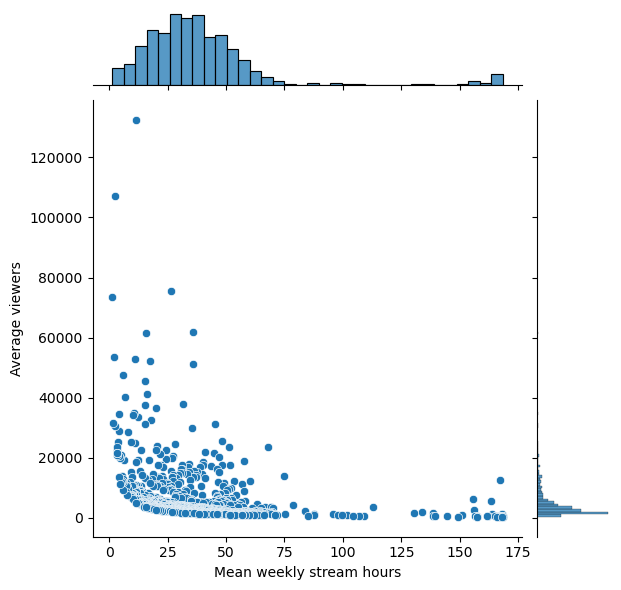

In [211]:
sns.jointplot(data=final, x='Mean weekly stream hours', y='Average viewers')
# plt.plot(xs, ys, color = 'orange')

In [216]:
final['Inverse avg viewers'] = 1/final['Average viewers']
final['fs'] = pd.cut(final['Followers'],5, labels = [1, 2, 3, 4, 5])

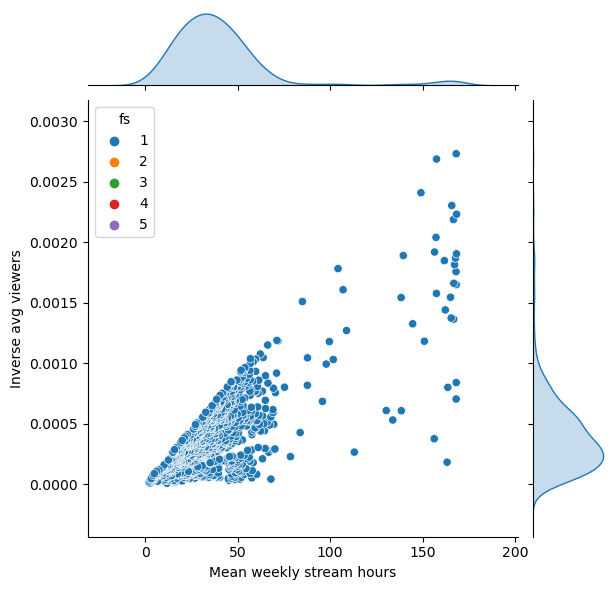

In [219]:
sns.jointplot(data=final[final['fs'] == 1], x='Mean weekly stream hours', y='Inverse avg viewers', hue = 'fs')
# plt.plot(xs, ys, color = 'orange')

In [ ]:
from scipy import stats
df1 = df1[(np.abs(stats.zscore(df1)) < 2.5).all(axis=1)]

In [51]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformed = pt.fit_transform(eng[['Followers', 'Average viewers']])
df1 = pd.DataFrame(transformed)
df1 = df1.rename(columns={0: 'Followers', 1: 'Average_viewers'})

NameError: name 'eng' is not defined

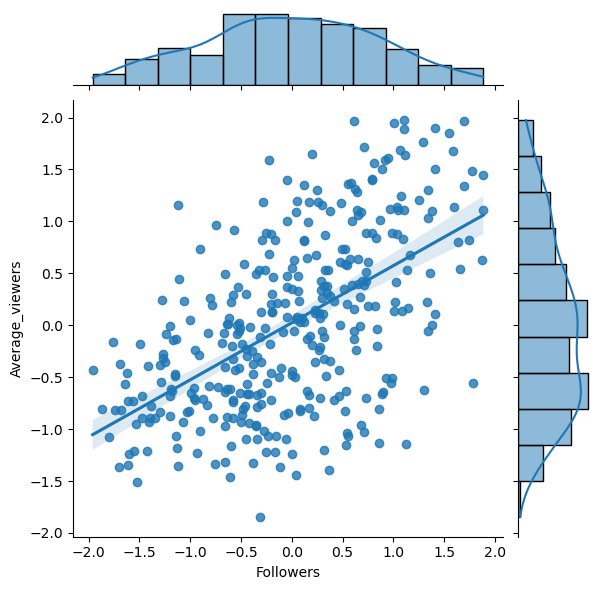

In [141]:
sns.jointplot(data=df1, x = 'Followers', y ='Average_viewers', kind="reg")

In [142]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [143]:
fit = smf.ols("Average_viewers ~ Followers", data=df1).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:        Average_viewers   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     159.6
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.99e-30
Time:                        15:34:26   Log-Likelihood:                -373.87
No. Observations:                 354   AIC:                             751.7
Df Residuals:                     352   BIC:                             759.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0241      0.037      0.651      0.5

<Axes: xlabel='Followers', ylabel='Average_viewers'>

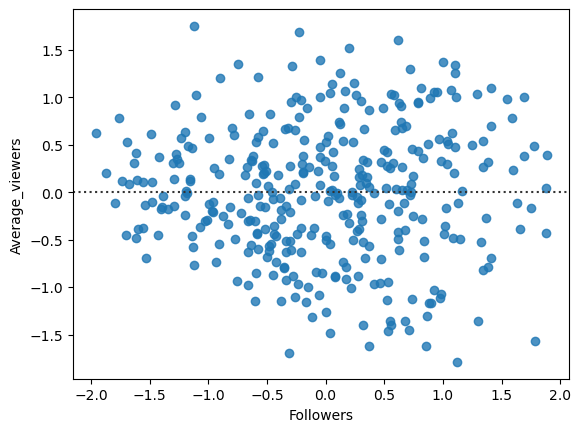

In [144]:
sns.residplot(data=df1, x="Followers", y="Average_viewers")

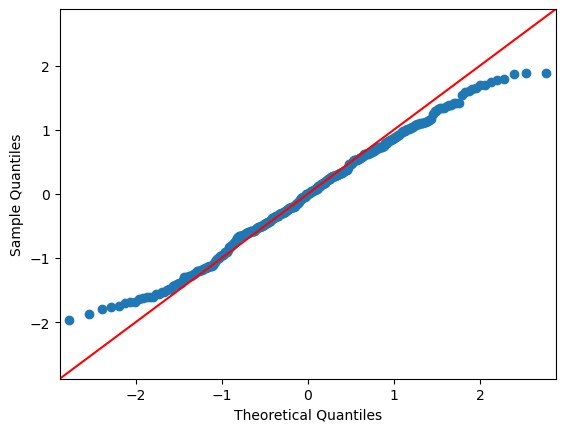

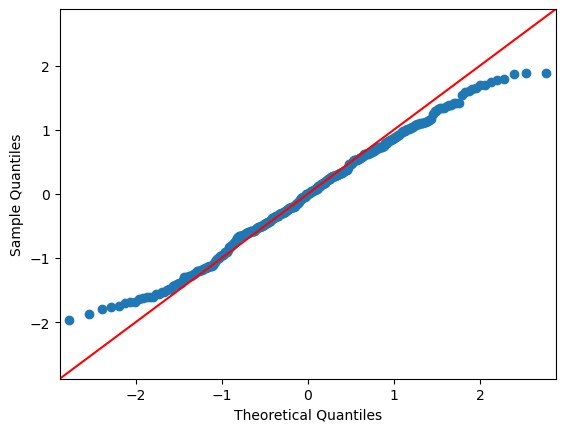

In [145]:
sm.qqplot(df1['Followers'], line ='45') 

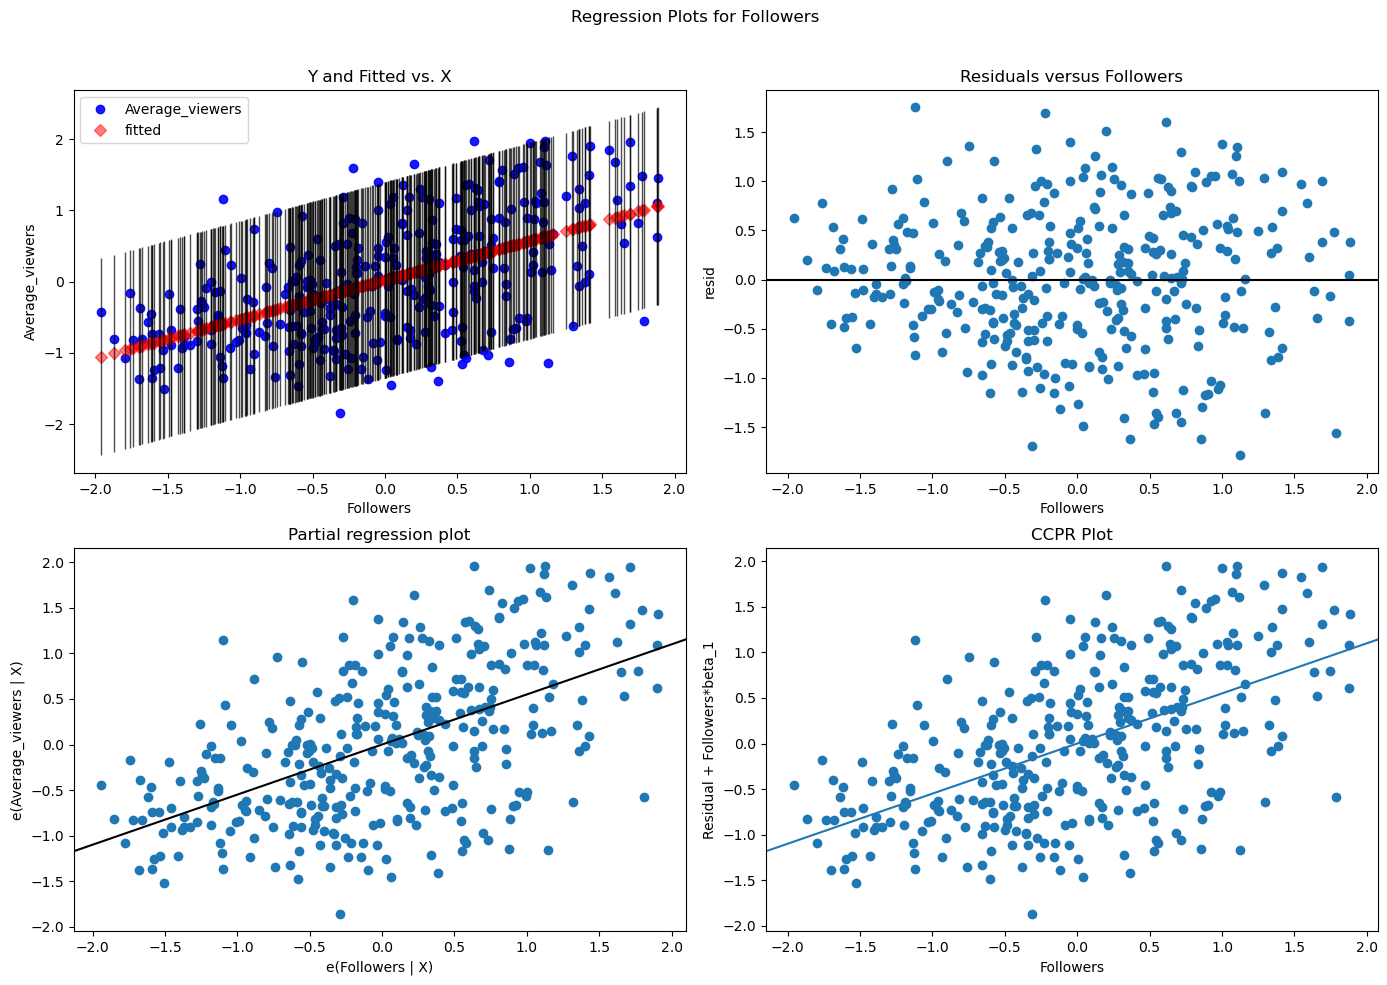

In [146]:
fig = plt.figure(figsize=(14, 10)) 
fig = sm.graphics.plot_regress_exog(fit, 
                                    'Followers', 
                                    fig=fig) 